In [1]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
player = pd.read_csv('data/baseball/player.csv', usecols=[0,1,13,14,15,16,17,18,19,20,21])
salary = pd.read_csv('data/baseball/salary.csv')
appearances = pd.read_csv('data/baseball/appearances.csv')
batting = pd.read_csv('data/baseball/batting.csv')
fielding = pd.read_csv('data/baseball/fielding.csv')
team = pd.read_csv('data/baseball/team.csv')
pitching = pd.read_csv('data/baseball/pitching.csv')

In [3]:
app_player = appearances.merge(player).sort_values(by=['year', 'team_id', 'player_id']).reset_index()

In [4]:
app_player['age'] = app_player.year - app_player.birth_year
app_player['years_in_mlb'] = app_player.year - app_player.debut.dropna().str[0:4].astype(int)

In [5]:
appearances['age'] = app_player.age
appearances['years_in_mlb'] = app_player.years_in_mlb

For the project, we are looking at the importance of salary for building a baseball team.

### Salary Over Time

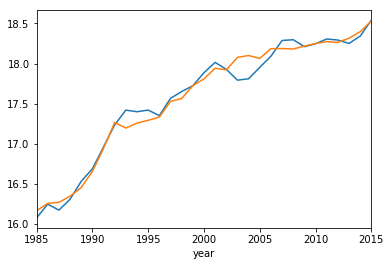

In [6]:
np.log(salary[salary.league_id == 'AL'].groupby(['year', 'team_id'])['salary'].sum().groupby('year').median()).plot()
np.log(salary[salary.league_id == 'NL'].groupby(['year', 'team_id'])['salary'].sum().groupby('year').median()).plot()

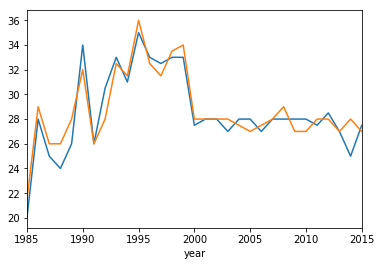

In [7]:
(salary[salary.league_id == 'AL'].groupby(['year', 'team_id']).size().groupby('year').median()).plot()
(salary[salary.league_id == 'NL'].groupby(['year', 'team_id']).size().groupby('year').median()).plot()

In [8]:
salary[salary.year == 2015].groupby('team_id')['salary'].sum().median() / salary[salary.year == 1985].groupby('team_id')['salary'].sum().median()

11.202202483475384

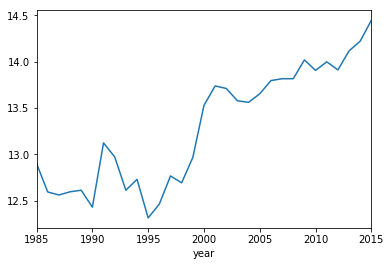

In [9]:
np.log(salary.groupby('year')['salary'].median()).plot()

In [10]:
for year in range(2011, 2016):
    stats = salary[(salary.league_id == 'AL') & (salary.year == year)].groupby(['team_id'])['salary'].sum().describe()
    print(f'{year}:\n{stats}\n')

2011:
count    1.400000e+01
mean     9.765480e+07
std      4.793501e+07
min      3.571200e+07
25%      6.355998e+07
50%      8.920493e+07
75%      1.240260e+08
max      2.022750e+08
Name: salary, dtype: float64

2012:
count    1.400000e+01
mean     1.043745e+08
std      4.438653e+07
min      5.537250e+07
25%      7.559540e+07
50%      8.803155e+07
75%      1.293527e+08
max      1.965223e+08
Name: salary, dtype: float64

2013:
count    1.500000e+01
mean     1.022085e+08
std      5.141290e+07
min      1.789070e+07
25%      7.467127e+07
50%      8.439333e+07
75%      1.252314e+08
max      2.319789e+08
Name: salary, dtype: float64

2014:
count    1.500000e+01
mean     1.018388e+08
std      3.967335e+07
min      3.511630e+07
25%      7.612299e+07
50%      9.253110e+07
75%      1.171217e+08
max      1.975439e+08
Name: salary, dtype: float64

2015:
count    1.600000e+01
mean     1.137962e+08
std      4.946412e+07
min      4.875000e+06
25%      8.551120e+07
50%      1.126830e+08
75%      1.275

In [11]:
for year in range(2011, 2016):
    stats = salary[(salary.league_id == 'NL') & (salary.year == year)].groupby(['team_id'])['salary'].sum().describe()
    print(f'{year}:\n{stats}\n')

2011:
count    1.600000e+01
mean     8.858363e+07
std      3.446501e+07
min      4.504700e+07
25%      6.212870e+07
50%      8.625001e+07
75%      1.086248e+08
max      1.729764e+08
Name: salary, dtype: float64

2012:
count    1.600000e+01
mean     9.196861e+07
std      2.892415e+07
min      5.524470e+07
25%      7.700339e+07
50%      8.551349e+07
75%      1.008157e+08
max      1.745389e+08
Name: salary, dtype: float64

2013:
count    1.500000e+01
mean     1.000932e+08
std      4.788972e+07
min      3.360190e+07
25%      7.567805e+07
50%      9.013200e+07
75%      1.100539e+08
max      2.233622e+08
Name: salary, dtype: float64

2014:
count    1.600000e+01
mean     1.040459e+08
std      5.201297e+07
min      4.500000e+06
25%      7.680492e+07
50%      9.773525e+07
75%      1.235157e+08
max      2.170146e+08
Name: salary, dtype: float64

2015:
count    1.500000e+01
mean     1.128935e+08
std      4.078062e+07
min      5.695900e+07
25%      9.229055e+07
50%      1.116930e+08
75%      1.188

### Distributions

#### By year (individual players)

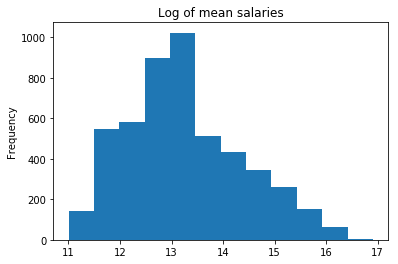

In [12]:
np.log(salary.groupby('player_id')['salary'].mean()).plot(kind='hist', bins=12, title='Log of mean salaries')

In [13]:
def distribution_salary(year):
    np.log(salary[(salary.year == year)].salary).plot(kind='hist', bins=20, title=f'Log salaries in {year}')

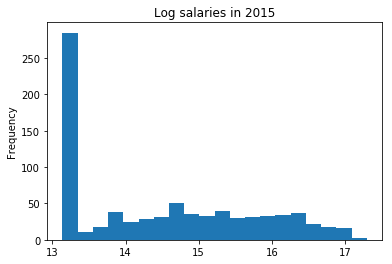

In [14]:
distribution_salary(2015)

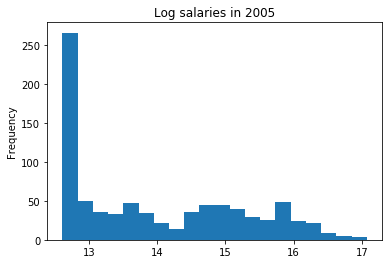

In [15]:
distribution_salary(2005)

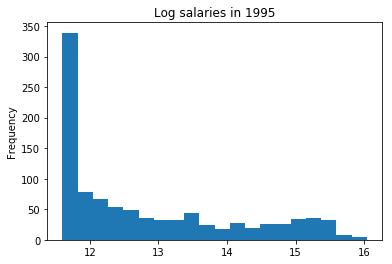

In [16]:
distribution_salary(1995)

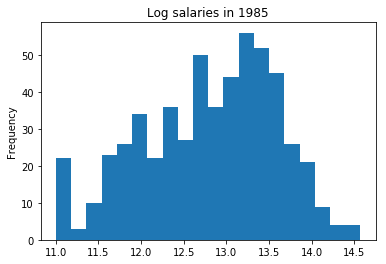

In [17]:
distribution_salary(1985)

1985 is the only year in which the distributions of individual salaries appears to be fairly normal.

#### By year (team totals)

In [18]:
import seaborn as sns

In [19]:
team_salary = team.merge(salary)
winners = team_salary[(team_salary.w / team_salary.l) >= 1]
losers = team_salary[(team_salary.w / team_salary.l) < 1]

In [20]:
def distribution_team_salary(year):
    np.log(winners[(winners.year == year)].groupby('team_id')['salary'].sum()).plot(
        kind='hist', bins=8, title=f'Log team salaries {year}', alpha=0.5)
    np.log(losers[(losers.year == year)].groupby('team_id')['salary'].sum()).plot(
        kind='hist', bins=8, title=f'Log team salaries {year}', alpha=0.5)
    np.log(winners[(winners.year == year) & (winners.ws_win == 'Y')].groupby('team_id')['salary'].sum()).plot(
        kind='hist', bins=8, title=f'Log team salaries {year}', alpha=0.5)

Blue bars represent teams with a record better than .500, orange bars are teams with less than .500.

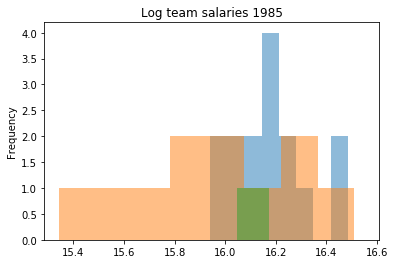

In [21]:
distribution_team_salary(1985)

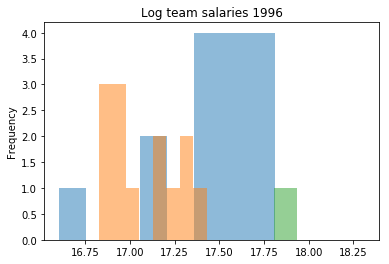

In [22]:
distribution_team_salary(1996)

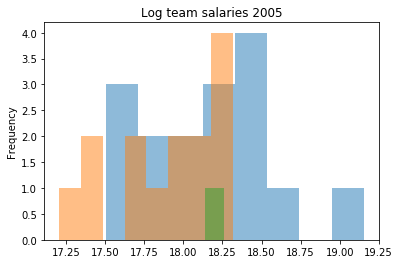

In [23]:
distribution_team_salary(2005)

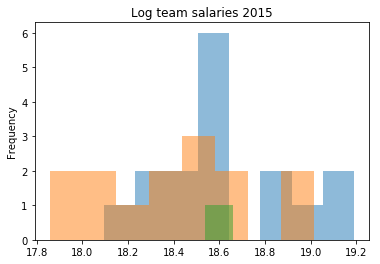

In [24]:
distribution_team_salary(2015)

In [25]:
(salary[salary.year == 2015].groupby('team_id')['salary'].sum() / 1000000).describe()

count     30.000000
mean     117.138086
std       40.371667
min       61.834000
25%       90.591524
50%      112.683050
75%      121.657879
max      215.792000
Name: salary, dtype: float64

### Scatterplots and Regressions

#### Do Higher Team Salaries Translate to More Wins?

In [26]:
team_salary = team.merge(salary).drop(1994)

In [27]:
def salary_year(year):
    team_salary_year = team_salary[team_salary.year == year]
    wins = team_salary_year.groupby('team_id')['w'].median()
    salary_total = team_salary_year.groupby('team_id')['salary'].sum()
    rel_salary_total = (salary_total - salary_total.mean()) / salary_total.std()
    ws = team_salary_year[team_salary_year.ws_win == 'Y']
    ws_salary = (ws.groupby('team_id')['salary'].sum() - salary_total.mean()) / salary_total.std()
    ws_wins = ws.groupby('team_id')['w'].median()
    return wins, salary_total

In [37]:
def wins_salary_graph(year):
    wins, salary_total = salary_year(year)
    plt.scatter(salary_total, wins)
    plt.ylabel("Team wins")
    plt.xlabel("Difference in team salary from mean by std")
    plt.title(f"How does salary impact wins?\n{year} season")

In [29]:
def salary_total():
    wins = team_salary.groupby(['year','team_id'])['w'].median().reset_index('year').drop('year',axis=1)
    salary_total = team_salary.groupby(['year','team_id'])['salary'].sum()
    rel_salary_total = (salary_total.xs(1985) - salary_total.xs(1985).mean()) / salary_total.xs(1985).std()
    for year in range(1986,2016):
        rel_salary = (salary_total.xs(year) - salary_total.xs(year).mean()) / salary_total.xs(year).std()
        rel_salary_total = pd.concat([rel_salary_total,rel_salary])
    return wins, rel_salary_total

In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Users/jnelson/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [31]:
# For all years
y, X = salary_total()
X = sm.add_constant(X)
results = smf.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     109.4
Date:                Tue, 14 Nov 2017   Prob (F-statistic):           3.19e-24
Time:                        12:28:21   Log-Likelihood:                -3405.6
No. Observations:                 888   AIC:                             6815.
Df Residuals:                     886   BIC:                             6825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.9110      0.376    212.307      0.0

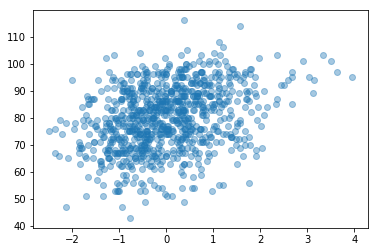

In [32]:
wins, salary_total = salary_total()
plt.scatter(salary_total, wins, alpha=0.4)

In [33]:
(team_salary[(team_salary.year == 2015)].groupby(['year', 'team_id'])['salary'].sum() / 1000000).describe()

count     30.000000
mean     116.975586
std       40.611048
min       56.959000
25%       90.591524
50%      112.683050
75%      121.657879
max      215.792000
Name: salary, dtype: float64

In [34]:
for year in range(1985, 2016):
    y, X = salary_year(year)
    X = np.log(X)
    X = sm.add_constant(X)
    results = smf.OLS(y, X).fit()
    print(f'\nFor {year}:\n{results.summary()}')


For 1985:
                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     3.505
Date:                Tue, 14 Nov 2017   Prob (F-statistic):             0.0734
Time:                        12:28:21   Log-Likelihood:                -100.43
No. Observations:                  26   AIC:                             204.9
Df Residuals:                      24   BIC:                             207.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -187.4236    143.288     -1.3


For 2000:
                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     3.141
Date:                Tue, 14 Nov 2017   Prob (F-statistic):             0.0872
Time:                        12:28:21   Log-Likelihood:                -109.50
No. Observations:                  30   AIC:                             223.0
Df Residuals:                      28   BIC:                             225.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -42.3212     69.572     -0.6

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

For 2015:
                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.767
Date:                Tue, 14 Nov 2017   Prob (F-statistic):              0.194
Time:                        12:28:22   Log-Likelihood:                -111.55
No. Observations:                  30   AIC:                             227.1
Df Residuals:                      28   BIC:                             229.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

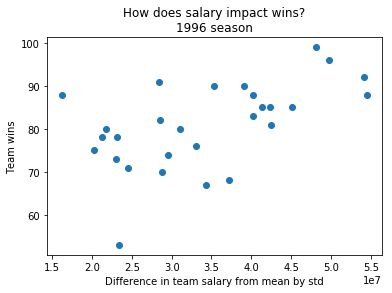

In [38]:
wins_salary_graph(1996)

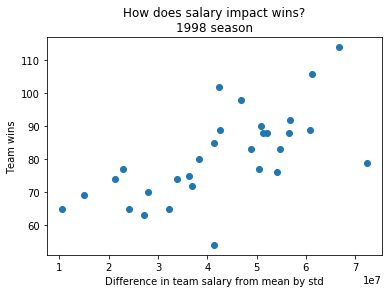

In [39]:
wins_salary_graph(1998)

#### What about the spread of salaries?

In [40]:
def salary_dist_year(year):
    team_salary_year = team_salary[team_salary.year == year]
    wins = team_salary_year.groupby('team_id')['w'].median()
    salary_total = team_salary_year.groupby('team_id')['salary'].sum()
    salary_dist = team_salary_year.groupby('team_id')['salary'].std()
    return wins, salary_total, salary_dist

In [41]:
for year in range(1985, 2016):
    y, X1, X2 = salary_dist_year(year)
    X = pd.concat([X1,X2],axis=1)
    X = np.log(X)
    X = sm.add_constant(X)
    results = smf.OLS(y, X).fit()
    print(f'\nFor {year}:\n{results.summary()}')


For 1985:
                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     2.390
Date:                Tue, 14 Nov 2017   Prob (F-statistic):              0.114
Time:                        12:29:05   Log-Likelihood:                -99.749
No. Observations:                  26   AIC:                             205.5
Df Residuals:                      23   BIC:                             209.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -193.4270    142.681     -1.3


For 1997:
                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     1.864
Date:                Tue, 14 Nov 2017   Prob (F-statistic):              0.176
Time:                        12:29:05   Log-Likelihood:                -100.62
No. Observations:                  28   AIC:                             207.2
Df Residuals:                      25   BIC:                             211.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -67.3657     76.980     -0.8


For 2008:
                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     2.138
Date:                Tue, 14 Nov 2017   Prob (F-statistic):              0.137
Time:                        12:29:05   Log-Likelihood:                -112.02
No. Observations:                  30   AIC:                             230.0
Df Residuals:                      27   BIC:                             234.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -116.2593     96.729     -1.2

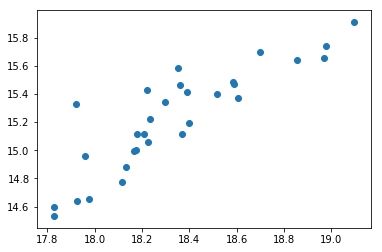

In [42]:
y, X1, X2 = salary_dist_year(2012)
X = pd.concat([X1,X2],axis=1)
plt.scatter(np.log(X1),np.log(X2))

### Salary by Position

In [43]:
appearances['str_pos'] = appearances[['g_p', 'g_c', 'g_1b', 'g_2b', 'g_3b', 'g_ss',
                                'g_lf', 'g_cf', 'g_rf', 'g_dh']].idxmax(axis=1).str.replace('g_', '')

In [44]:
appearances[appearances.year > 1984].groupby('str_pos').size()

str_pos
1b     2171
2b     2308
3b     2230
c      3172
cf     1978
dh      810
lf     2857
p     18971
rf     2250
ss     1999
dtype: int64

#### Do starters play more seasons than non-starters?

A friend suggested there may be a relationship between number of games played per year and how long a player remains in the MLB. The scatterplot below shows somewhat of a U-shaped relationship between the two. The cluster in the bottom-left are a majority of players who rarely start games and only play in the MLB for a few years.

In [45]:
app_salary = appearances.merge(salary)

In [46]:
seasons = app_salary.groupby('player_id').size()
gs = app_salary.groupby('player_id')['gs'].mean()
g = app_salary.groupby('player_id')['g_all'].mean()
age = app_salary.groupby('player_id')['age'].max()

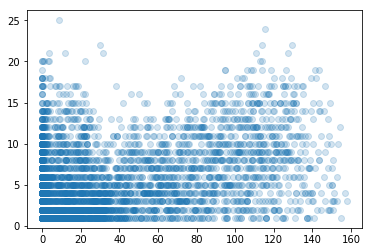

In [47]:
plt.scatter(gs, seasons, alpha=0.2)

#### Salary by position

In [48]:
app_salary[app_salary.year == 2015].groupby('str_pos')['salary'].median() / 1000000

str_pos
1b    3.10000
2b    1.07500
3b    2.52500
c     1.03750
cf    1.65000
dh    6.58300
lf    2.10000
p     1.48000
rf    4.10000
ss    1.44375
Name: salary, dtype: float64

In [49]:
positions = {}
for pos in ['p', 'c', '1b', '2b', '3b', 'ss', 'lf', 'cf', 'rf', 'dh']:
    positions[(pos.replace('', ''))] = app_salary[app_salary.str_pos == pos]

In [50]:
def distribution_salary_pos(year, pos):
    pos_df = app_salary[app_salary.str_pos == pos]
    np.log(pos_df[(pos_df.year == year)].groupby('player_id')['salary'].mean()).plot(
        kind='hist', bins=10, title=f'Log salaries for {pos} in {year}', alpha=0.5)

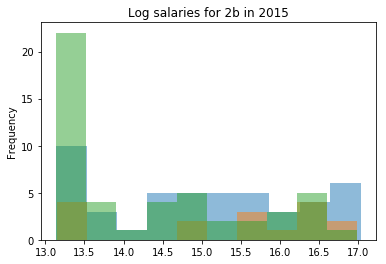

In [51]:
distribution_salary_pos(2015, '1b')
distribution_salary_pos(2015, 'dh')
distribution_salary_pos(2015, '2b')

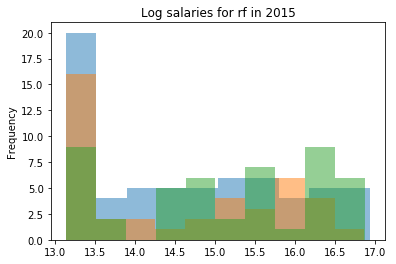

In [52]:
distribution_salary_pos(2015, 'lf')
distribution_salary_pos(2015, 'cf')
distribution_salary_pos(2015, 'rf')

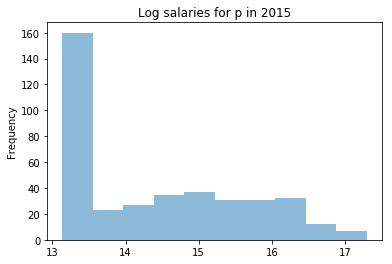

In [53]:
distribution_salary_pos(2015, 'p')

### Player Features

In [54]:
features = app_salary

In [55]:
features = features.merge(player)

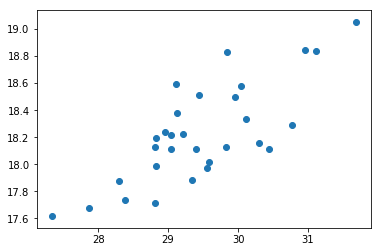

In [56]:
team_age = features[features.year == 2012].groupby('team_id')['age'].mean()
team_salary = features[features.year == 2012].groupby('team_id')['salary'].sum()
plt.scatter(team_age, np.log(team_salary))

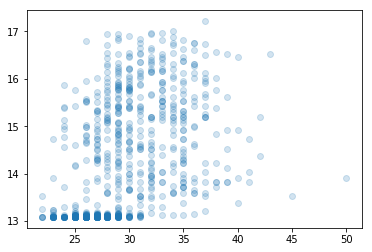

In [57]:
plt.scatter(features[features.year == 2012].age, np.log(features[features.year == 2012].salary), alpha=0.2)